#  Unlocking the mystery behind finding a romantic partner

### *Singapore's total fertility rate drops to historic low of 1.05 - CNA* 


![image](https://raw.githubusercontent.com/Topheral/Dating-analysis/main/Dataset/decreasing%20birthrate.png?token=GHSAT0AAAAAACBOLLBXZ5KT5XXKNXALHOQ6ZB27TRA)

## Introduction

Singapore has been experiencing an all-time low birthrate in recent years, which has raised concerns about the country's future. In fact, the birthrate has fallen below the replacement level, meaning that the population is not being replaced at a sustainable rate. This has led policymakers to explore various ways to encourage Singaporeans to have more children, including financial incentives, parental leave policies, and campaigns to promote family values. **Our project aims to contribute to these efforts by identifying factors that can help individuals form successful romantic relationships**, which in turn can lead to starting families and boosting the birthrate.



### About the data:
* Data was gathered from 552 participants in experimental speed dating events and compiled by professors Ray Fisman and Sheena Iyengar from Columbia Business School. 
* The participants in the dating events would each have a four-minute "first date" with a participant of the opposite sex. 
* At the end of their four minutes, participants were asked if they would like to see their date again. Additionally, they were also asked to rate their date on six attributes: 
  * Attractiveness
  * Sincerity
  * Fun
  * Intelligence
  * Shared Interests
  * Ambition
* The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: 
  * demographics
  * dating habits
  * self-perception across key attributes
  * beliefs on what others find valuable in a mate
  * lifestyle information

We also provided the data dictionary and question key (dating-data-key.doc) in the dataset folder in the repository. 


### Import Necessary libaries

In [2]:
import pandas as pd
pd.options.display.max_rows = 1000 #for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
# importing data
dates = pd.read_csv('Dataset/Speed Dating Data.csv', encoding="ISO-8859-1") # we are using this encoding due to the format of the dataset. 
dates.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# calculate the null values
dates.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

### Data cleaning and EDA

There are a lot of fields with NaNs based on the quick glance at the data we had above. There are 8,378 rows, thousands of NaNs are present in a number of fields, and using imputation to infer values is probably not the best course of action. Instead, we omitted these fields from the dataset that have over 4000 null values, limiting our analysis to the fields that we can actually use. Before we delete some fields and rows due to missing values, let's first look at some totals.


Text(0, 0.5, 'Frequency')

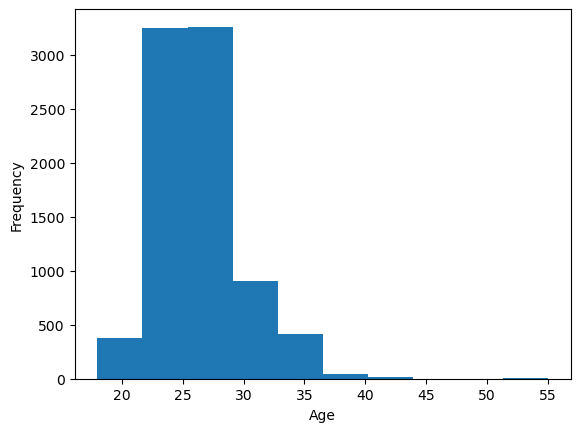

In [15]:
# Participants' age distribution 
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

from the bar graph above, we can see that the majority of the participants ranged in age from mid-20s to early-30s.

Now, let's see how many of the participants found a match at the end of the events:

In [12]:
pd.crosstab(index=dates['match'],columns="count")

col_0,count
match,
0,6998
1,1380


Only **20% of participants** in the dating event appear to have found a second date.

###### Narrowing the dataset:

In [14]:
dates_1 = dates.iloc[:, 11:28]
dates_2 = dates.iloc[:, 30:35]
dates_3 = dates.iloc[:, 39:43]
dates_4 = dates.iloc[:, 45:67]
dates_5 = dates.iloc[:, 69:74]
dates_6 = dates.iloc[:, 87:91]
dates_7 = dates.iloc[:, 97:102]
dates_8 = dates.iloc[:, 104:107]

date = pd.concat([dates.iloc[:, 0],dates.iloc[:, 2],dates_1,dates_2,dates_3,dates_4,dates_5,
                  dates_6,dates_7,dates_8], axis=1)

In [16]:
# calculate null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [17]:
# deleting null rows that the nulls are in the hundreds and not in the thousands
date2 = date.dropna()

In [18]:
# check datatypes
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64
